In [1]:
import pybroker as pb
from pybroker.ext.data import AKShare
from pybroker import Strategy, StrategyConfig, ExecContext

pb.enable_data_source_cache('my_strategy')

/home/liubei/miniconda3/envs/turtle/lib/python3.12/site-packages/py_mini_racer/py_mini_racer.py:15: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# 定义全局参数 "stock_code"（股票代码）、"percent"（持仓百分比）和 "stop_profit_pct"（止盈百分比）
pb.param(name='stock_code', value='601601')
pb.param(name='percent', value=1)
pb.param(name='stop_loss_pct', value=10)
pb.param(name='stop_profit_pct', value=10)

10

In [3]:
config = StrategyConfig(initial_cash=20000)

In [4]:
strategy = Strategy(AKShare(), '1/1/2025', '30/12/2025', config)

/home/liubei/miniconda3/envs/turtle/lib/python3.12/site-packages/pybroker/common.py:241: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date).to_pydatetime()


In [5]:
# 定义交易策略：如果当前没有持有该股票，则买入股票，并设置止盈点位
def buy_with_stop_loss(ctx: ExecContext):
    if ctx.short_pos():
        return
    # If the latest close price is more than the previous day's high price,
    # then place a sell order.
    if ctx.bars >= 2 and ctx.close[-1] > ctx.high[-2]:
        # Short 100 shares.
        ctx.sell_shares = 100
        # Cover the shares after 2 bars (in this case, 2 days).
        ctx.hold_bars = 2

In [6]:
strategy.add_execution(buy_with_stop_loss,  symbols=[pb.param(name='stock_code')])

In [7]:
result = strategy.backtest()

Backtesting: 2025-01-01 00:00:00 to 2025-12-30 00:00:00

Loaded cached bar data.

Test split: 2025-01-02 00:00:00 to 2025-12-24 00:00:00


100% (238 of 238) |######################| Elapsed Time: 0:00:00 Time:  0:00:0000



Finished backtest: 0:00:04


### 查看投资组合的每日余额

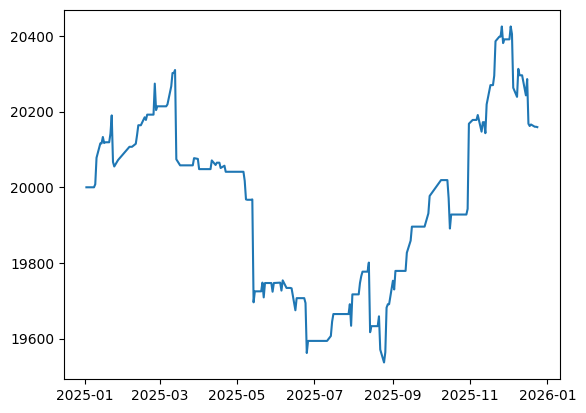

In [8]:
import matplotlib.pyplot as plt

chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])

In [9]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2025-01-02,20000.0,20000.0,0.0,20000.0,0.0,0.0,0.0
2025-01-03,20000.0,20000.0,0.0,20000.0,0.0,0.0,0.0
2025-01-06,20000.0,20000.0,0.0,20000.0,0.0,0.0,0.0
2025-01-07,20000.0,20000.0,0.0,20000.0,0.0,0.0,0.0
2025-01-08,20000.0,20000.0,0.0,20000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-18,20168.0,20168.0,4108.0,20162.0,168.0,-6.0,0.0
2025-12-19,20168.0,20168.0,4104.0,20166.0,168.0,-2.0,0.0
2025-12-22,20160.0,20160.0,0.0,20160.0,160.0,0.0,0.0


### 持仓

In [10]:
result.positions

long_shares  short_shares  close  equity  market_value  \
symbol date                                                                 
601601 2025-01-09            0           100  31.90     0.0        3198.0   
       2025-01-10            0           100  31.20     0.0        3198.0   
       2025-01-15            0           100  31.15     0.0        3132.0   
       2025-01-16            0           100  31.31     0.0        3132.0   
       2025-01-21            0           100  31.77     0.0        3200.0   
...                        ...           ...    ...     ...           ...   
       2025-12-15            0           100  39.58     0.0        3905.0   
       2025-12-16            0           100  39.15     0.0        3905.0   
       2025-12-18            0           100  41.08     0.0        4102.0   
       2025-12-19            0           100  41.04     0.0        4102.0   
       2025-12-24            0           100  41.50     0.0        4149.0   

                   margin  unrealized_pnl  
symbol date                                
601601 2025-01-09  3190.0             8.0  
       2025-01-10  3120.0            78.0  
       2025-01-15  3115.0            17.0  
       2025-01-16  3131.0             1.0  
       2025-01-21  3177.0            23.0  
...                   ...             ...  
       2025-12-15  3958.0           -53.0  
       2025-12-16  3915.0           -10.0  
       2025-12-18  4108.0            -6.0  
       2025-12-19  4104.0            -2.0  
       2025-12-24  4150.0            -1.0  

[77 rows x 7 columns]

In [11]:
result.trades

,type,symbol,entry_date,exit_date,entry,exit,shares,pnl,return_pct,agg_pnl,bars,pnl_per_bar,stop,mae,mfe
id,,,,,,,,,,,,,,,
1,short,601601,2025-01-09,2025-01-13,31.98,30.82,100,116.0,3.76,116.0,2,58.0,bar,-0.32,1.16
2,short,601601,2025-01-15,2025-01-17,31.32,31.29,100,3.0,0.10,119.0,2,1.5,bar,-0.46,0.41
3,short,601601,2025-01-21,2025-01-23,32.00,32.52,100,-52.0,-1.60,67.0,2,-26.0,bar,-0.52,0.95
4,short,601601,2025-01-24,2025-02-05,32.40,32.00,100,40.0,1.25,107.0,2,20.0,bar,-0.58,0.40
5,short,601601,2025-02-10,2025-02-12,32.45,31.88,100,57.0,1.79,164.0,2,28.5,bar,-0.25,0.57
6,short,601601,2025-02-17,2025-02-19,32.84,32.56,100,28.0,0.86,192.0,2,14.0,bar,-0.56,0.62
7,short,601601,2025-02-25,2025-02-27,32.62,32.40,100,22.0,0.68,214.0,2,11.0,bar,-0.86,0.85
8,short,601601,2025-03-07,2025-03-11,31.24,30.36,100,88.0,2.90,302.0,2,44.0,bar,-0.28,0.88
9,short,601601,2025-03-13,2025-03-17,30.70,33.14,100,-244.0,-7.36,58.0,2,-122.0,bar,-2.57,0.30


In [12]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,sell,601601,2025-01-09,100,NaN,31.98,0.0
2,buy,601601,2025-01-13,100,NaN,30.82,0.0
3,sell,601601,2025-01-15,100,NaN,31.32,0.0
4,buy,601601,2025-01-17,100,NaN,31.29,0.0
5,sell,601601,2025-01-21,100,NaN,32.00,0.0
...,...,...,...,...,...,...,...
73,sell,601601,2025-12-15,100,NaN,39.05,0.0
74,buy,601601,2025-12-17,100,NaN,40.33,0.0
75,sell,601601,2025-12-18,100,NaN,41.02,0.0


In [13]:
result.metrics_df

,name,value
0,trade_count,38
1,initial_market_value,20000.0
2,end_market_value,20159.0
3,total_pnl,160.0
4,unrealized_pnl,-1.0
5,total_return_pct,0.8
6,total_profit,1568.0
7,total_loss,-1408.0
8,total_fees,0.0
9,max_drawdown,-773.0
